In [ ]:
#@title
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.cm as cm

import os
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_ubyte

import numpy as np

[[0.   0.04 0.07 0.04 0.  ]
 [0.04 0.26 0.51 0.26 0.04]
 [0.07 0.51 1.   0.51 0.07]
 [0.04 0.26 0.51 0.26 0.04]
 [0.   0.04 0.07 0.04 0.  ]]


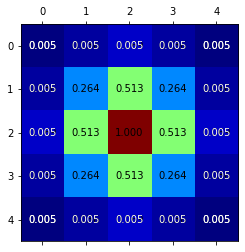

In [ ]:
sig = 1.5
g_filt = np.zeros((5,5))
for i in np.arange(-2,3,1):
  for j in np.arange(-2,3,1):
    d = i*i + j*j
    g_filt[i+2,j+2] = np.exp(-d/sig)
    #print("{0:0.3f}".format(val),end=' ')
  #print('\n')

print(g_filt)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.matshow(g_filt, cmap=plt.cm.jet)

for i in np.arange(5):
    for j in np.arange(5):
        c = g_filt[i,j]
        ax.text(i, j, "{0:0.3f}".format(c), va='center', ha='center',color='black')
for i in np.arange(5):
  ax.text(i, 0, "{0:0.3f}".format(c), va='center', ha='center',color='white')
  ax.text(0, i, "{0:0.3f}".format(c), va='center', ha='center',color='white')
  ax.text(i, 4, "{0:0.3f}".format(c), va='center', ha='center',color='white')
  ax.text(4, i, "{0:0.3f}".format(c), va='center', ha='center',color='white')

In [ ]:
#@title
def show_image(_img,title_str=None,cmap='gray'):
  if(cmap == 'gray'):
    fig = px.imshow(_img, title=title_str, range_color=[0,255],color_continuous_scale=cmap)  
  else:
    fig = px.imshow(_img, title=title_str,color_continuous_scale=cmap)  
  fig.show()

In [ ]:

img = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif')

if len(img.shape) == 3:
  img = rgb2gray(img)

#print(img.dtype)
#print(img.min(), img.max())

show_image(img,'Input image')



# Smoothing Filters
 


In [ ]:
import cv2
from skimage import filters
from skimage.morphology import square


In [ ]:
# https://gist.githubusercontent.com/thomasaarholt/267ec4fff40ca9dff1106490ea3b7567/raw/5b15cc4f972b54d5fb1f1fdac6d3c09ed3e47a87/gaussian.py
import numpy as np
from scipy import signal

def gaussian_kernel(n, std, normalized=False):
    '''
    Generates a n x n matrix with a centered gaussian 
    of standard deviation std centered on it. If normalized,
    sum equals 1.'''
    gaussian1D = signal.gaussian(n, std)
    gaussian2D = np.outer(gaussian1D, gaussian1D)
    if normalized:
        gaussian2D /= (2*np.pi*(std**2))
    return gaussian2D

In [ ]:
F = 7 # filter size (FxF)

## average (mean) filter
avg_filter = np.ones((F,F),np.float32)/(F*F)
#avg_smoothed_img =  cv2.filter2D(img,-1,avg_filter)
avg_smoothed_img = cv2.blur(img,(F,F))

## gaussian filter
# Method-1: Specify only filter dimensions. If sigma is not specified, it is calculated from filter dimension (F)
gauss_smoothed_img = cv2.GaussianBlur(img,(F,F),0)  

# Method-2: Specify sigma and filter size
g_sigma=1.5
gauss_filter = gaussian_kernel(F,g_sigma,normalized=True)
gauss_smoothed_img = cv2.filter2D(img,-1,gauss_filter)

# Show original and filtered images side by side for comparison
disp_img = np.concatenate((img,avg_smoothed_img,gauss_smoothed_img),axis=1)
show_image(disp_img,'Original image (left), Average Smoothed (middle), Gaussian Smoothed (right)')




# Edge Filtering

In [ ]:

# toy image - 1
img = np.zeros(shape=(128,128),dtype=np.uint8)

offset = 20
sside = 45

img[offset:offset+sside,offset] = 255
img[offset:offset+sside,offset+sside-1] = 255
img[offset,offset:offset+sside] = 255
img[offset+sside-1,offset:offset+sside] = 255

imgF = img.astype(np.float64)

# 1-d derivatives (non centered)
filt_dx = np.array([[-1,1]]) 
imgF_dx = cv2.filter2D(imgF,-1,filt_dx)
imgF_dy = cv2.filter2D(imgF,-1,filt_dx.T) # T = transpose

# Show original and filtered images side by side for comparison
disp_img = np.concatenate((imgF,imgF_dx,imgF_dy),axis=1)
#show_image(disp_img,'Original image (left), x-gradient (middle), y-gradient (right)',cmap='jet')
show_image(disp_img,'Original image (left), x-gradient (middle), y-gradient (right)',cmap='gray') # Black and white

In [ ]:
#prewitt

prew_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prew_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
imgF_prew_x = cv2.filter2D(imgF, -1, prew_x)
imgF_prew_y = cv2.filter2D(imgF, -1, prew_y)

# Show original and filtered images side by side for comparison
disp_img = np.concatenate((imgF,imgF_prew_x,imgF_prew_y),axis=1)
show_image(disp_img,'Original image (left), x-gradient (middle), y-gradient (right)',cmap='jet')
#show_image(disp_img,'Original image (left), x-gradient (middle), y-gradient (right)',cmap='gray') # Black and white